In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct


In [2]:
import datashader.transfer_functions as tf
import datashader as ds
from datashader.mpl_ext import dsshow
import pandas as pd
import holoviews as hv
from holoviews.operation.datashader import dynspread
from holoviews.operation.datashader import datashade
import hvplot

In [3]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/mistflow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 14
mpl.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#plt.rc('text', usetex=True)
plt.rc('axes', unicode_minus=False)
width, height = plt.rcParams.get('figure.figsize')

In [4]:
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter
from scipy.stats import linregress
import seaborn as sns

In [5]:
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end+1], axis = 0)
    return tmp_avg

In [6]:
def mean_v_from_file(file):
    v_x = fits.open(file)[0].data
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

def mean_vy_from_file(file):
    v_x = fits.open(file)[1].data
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

In [7]:
def divv(Vx, Vy, stepsize):
    dvx_dx = np.gradient(Vx, axis=0)/stepsize
    dvy_dy = np.gradient(Vy, axis=1)/stepsize

    DIV = dvx_dx + dvy_dy
    return DIV

def rotorr(Vx, Vy, stepsize):
    dvx_dy = np.gradient(Vx, axis=1)/stepsize
    dvy_dx = np.gradient(Vy, axis=0)/stepsize

    ROTOR = dvy_dx - dvx_dy
    return ROTOR

In [8]:
def novi_div(Vx, Vy, stepsize):
    dvx_dx = np.gradient(Vx, axis=1)/stepsize
    dvy_dy = np.gradient(Vy, axis=0)/stepsize

    DIV = dvx_dx + dvy_dy
    return DIV

def novi_rot(Vx, Vy, stepsize):
    dvx_dy = np.gradient(Vx, axis=0)/stepsize
    dvy_dx = np.gradient(Vy, axis=1)/stepsize

    ROTOR = dvy_dx - dvx_dy
    return ROTOR

In [9]:
Vxm1 = fits.open("Velocities_TAU_0_1.fits")[0].data # Vy from Velocities.fits as originally thought
Vym1 = fits.open("Velocities_TAU_0_1.fits")[1].data # Vx from Velocities.fits as originally thought
Vxm1 = Vxm1[::3,::2,::2]/1E5
Vym1 = Vym1[::3,::2,::2]/1E5
#Vxm1 = Vxm1.transpose(0, 2, 1)
#Vym1 = Vym1.transpose(0, 2, 1)

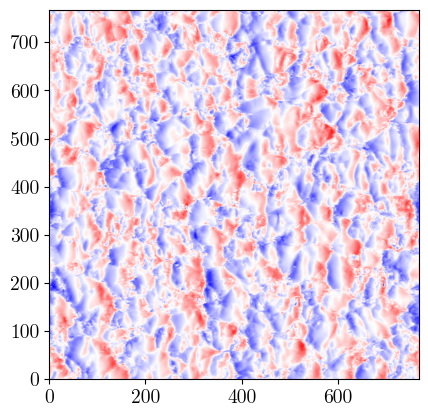

In [10]:
plt.imshow(Vxm1[0], origin = "lower", cmap = "bwr")

In [11]:
Vxm2 = fits.open("Velocities_TAU_0_010.fits")[0].data # Vy from Velocities.fits as originally thought
Vym2 = fits.open("Velocities_TAU_0_010.fits")[1].data # Vx from Velocities.fits as originally thought
Vxm2 = Vxm2[::3,::2,::2]/1E5
Vym2 = Vym2[::3,::2,::2]/1E5
#Vxm2 = Vxm2.transpose(0, 2, 1)
#Vym2 = Vym2.transpose(0, 2, 1)

In [12]:
Vxm1_mean = temporal_avg(Vxm1, 0, 90)
Vym1_mean = temporal_avg(Vym1, 0, 90)

In [13]:
Vxm1_filtered600 = gaussian_filter(Vxm1_mean, 22.5/2, mode = "wrap")
Vym1_filtered600 = gaussian_filter(Vym1_mean, 22.5/2, mode = "wrap")

In [14]:
Vxm1_filtered300 = gaussian_filter(Vxm1_mean, 11.25/2, mode = "wrap")
Vym1_filtered300 = gaussian_filter(Vym1_mean, 11.25/2, mode = "wrap")

In [15]:
Vx_ME_FeI = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_FeI_tracked.fits")[0].data
Vy_ME_FeI = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_FeI_tracked.fits")[1].data

In [16]:
Vx_BzFeI_cor = mean_v_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_FeI_tracked.fits")
Vy_BzFeI_cor = mean_vy_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_FeI_tracked.fits")

In [17]:
Vx_ME3_FeI = fits.open("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_FeI_tracked.fits")[0].data
Vy_ME3_FeI = fits.open("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_FeI_tracked.fits")[1].data

In [18]:
Vx_BzFeI_cor3 = mean_v_from_file("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_FeI_tracked.fits")
Vy_BzFeI_cor3 = mean_vy_from_file("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_FeI_tracked.fits")

<h2>Vx i Vx_{FLCT} bez transpose</h2>

In [19]:
R_bez_transpose = pearsonr(Vxm1_filtered600.flatten(), Vx_BzFeI_cor.flatten())
print(R_bez_transpose)

PearsonRResult(statistic=np.float64(-0.005283171040413601), pvalue=np.float64(4.960186325287898e-05))


<h2>Vx i Vy_{FCLT} bez transpose</h2>

In [20]:
Ry_bez_transpose = pearsonr(Vxm1_filtered600.flatten(), Vy_BzFeI_cor.flatten())
print(Ry_bez_transpose)

PearsonRResult(statistic=np.float64(0.13422100709400195), pvalue=np.float64(0.0))


<h2>Vx bez transpose, Vx_{FLCT} sa tranpose</h2>

In [21]:
RT_bez_transpose = pearsonr(Vxm1_filtered600.flatten(), Vx_BzFeI_cor.T.flatten())
print(RT_bez_transpose)

PearsonRResult(statistic=np.float64(-0.06051230756476744), pvalue=np.float64(0.0))


<h2>Vx bez transpose, Vy_{FCLT} sa transpose</h2>

In [22]:
RyT_bez_transpose = pearsonr(Vxm1_filtered600.flatten(), Vy_BzFeI_cor.T.flatten())
print(RyT_bez_transpose)
# Odnosno kako smo i pre utvrdili da je transpose potrebno

PearsonRResult(statistic=np.float64(0.6829332067559243), pvalue=np.float64(0.0))


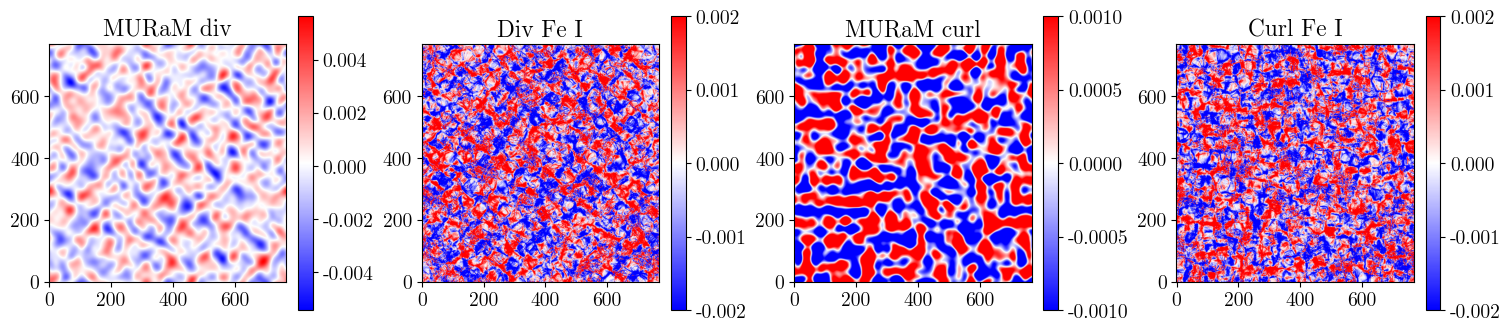

In [23]:
f = plt.figure(constrained_layout=True, figsize=(15,3.2))
plt.subplot(141)
plt.imshow(divv(Vxm1_filtered600, Vym1_filtered600, 32), origin = "lower", cmap = "bwr")
plt.title("MURaM div")
plt.colorbar()
plt.subplot(142)
plt.imshow(divv(Vx_BzFeI_cor, Vy_BzFeI_cor, 32), origin = "lower", cmap = "bwr", vmin = -0.002, vmax = 0.002)
plt.title("Div Fe I")
plt.colorbar()
plt.subplot(143)
plt.imshow(rotorr(Vxm1_filtered600, Vym1_filtered600, 32), origin = "lower", cmap = "bwr", vmin = -0.001, vmax = 0.001)
plt.title("MURaM curl")
plt.colorbar()
plt.subplot(144)
plt.imshow(rotorr(Vx_BzFeI_cor, Vy_BzFeI_cor, 32), origin = "lower", cmap = "bwr", vmin = -0.002, vmax = 0.002)
plt.title("Curl Fe I")
plt.colorbar()

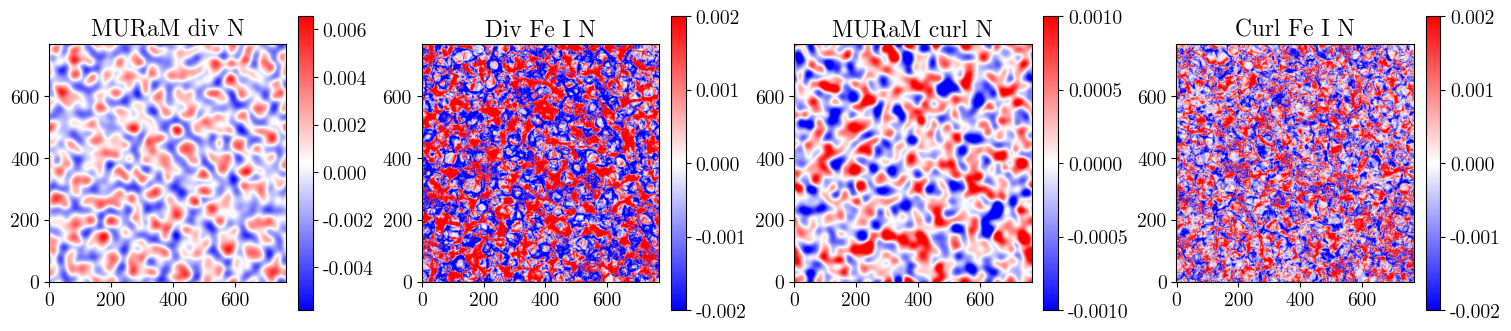

In [24]:
f = plt.figure(constrained_layout=True, figsize=(15,3.2))
plt.subplot(141)
plt.imshow(novi_div(Vxm1_filtered600, Vym1_filtered600, 32), origin = "lower", cmap = "bwr")
plt.title("MURaM div N")
plt.colorbar()
plt.subplot(142)
plt.imshow(novi_div(Vx_BzFeI_cor, Vy_BzFeI_cor, 32), origin = "lower", cmap = "bwr", vmin = -0.002, vmax = 0.002)
plt.title("Div Fe I N")
plt.colorbar()
plt.subplot(143)
plt.imshow(novi_rot(Vxm1_filtered600, Vym1_filtered600, 32), origin = "lower", cmap = "bwr", vmin = -0.001, vmax = 0.001)
plt.title("MURaM curl N")
plt.colorbar()
plt.subplot(144)
plt.imshow(novi_rot(Vx_BzFeI_cor, Vy_BzFeI_cor, 32), origin = "lower", cmap = "bwr", vmin = -0.002, vmax = 0.002)
plt.title("Curl Fe I N")
plt.colorbar()
#plt.savefig("BrzineDD1.png", dpi = 50, bbox_inches = "tight")